## **Dunnhunby The Complete Journey Analysis**
#### Adam Kahle, MSBA Candidate

*PLEASE NOTE: THIS ANALYSIS IS INCOMPLETE AND BEING CONTINUALLY DEVELOPED*

## **DATASET INSTALL**

#### **DATASET**

This dataset contains household level transactions over two years from a group of 2,500 households who are frequent shoppers at a retailer. It contains all of each household’s purchases, not just those from a limited number of categories. For certain households, demographic information as well as direct marketing contact history are included.

In [5]:
## imports
import kagglehub
from kagglehub import KaggleDatasetAdapter
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [6]:
## kaggle connection
path = kagglehub.dataset_download("frtgnn/dunnhumby-the-complete-journey")
print("Path to dataset files:", path)

100%|██████████| 124M/124M [00:00<00:00, 171MB/s]

Extracting files...


Path to dataset files: /root/.cache/kagglehub/datasets/frtgnn/dunnhumby-the-complete-journey/versions/1


In [7]:
## datasets
campaign_desc = pd.read_csv(f'{path}/campaign_desc.csv')
campaign_table = pd.read_csv(f'{path}/campaign_table.csv')
coupon = pd.read_csv(f'{path}/coupon.csv')
coupon_redempt = pd.read_csv(f'{path}/coupon_redempt.csv')
transaction_data = pd.read_csv(f'{path}/transaction_data.csv')
hh_demographic = pd.read_csv(f'{path}/hh_demographic.csv')
product = pd.read_csv(f'{path}/product.csv')

In [8]:
## download data to csv if needed
## campaign_desc.to_csv('campaign_desc.csv', index=False)
## campaign_table.to_csv('campaign_table.csv', index=False)
## coupon.to_csv('coupon.csv', index=False)
## coupon_redempt.to_csv('coupon_redempt.csv', index=False)
## transaction_data.to_csv('transaction_data.csv', index=False)
## hh_demographic.to_csv('hh_demographic.csv', index=False)
## product.to_csv('product.csv', index=False)

## **EXPLORATORY DATA ANALYSIS**

### **CAMPAIGN DESCRIPTION TABLE**


Campaign description data is a look up table, containing the start and the end days of each campaign (30 campaigns in total). Also it gives which campaign belongs to what category (Type A, B and C).

In [9]:
## preview campaign desc
campaign_desc.head()

,DESCRIPTION,CAMPAIGN,START_DAY,END_DAY
0,TypeB,24,659,719
1,TypeC,15,547,708
2,TypeB,25,659,691
3,TypeC,20,615,685
4,TypeB,23,646,684


In [10]:
## preview campaign desc
campaign_desc.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 30 entries, 0 to 29
Data columns (total 4 columns):
 #   Column       Non-Null Count  Dtype 
---  ------       --------------  ----- 
 0   DESCRIPTION  30 non-null     object
 1   CAMPAIGN     30 non-null     int64 
 2   START_DAY    30 non-null     int64 
 3   END_DAY      30 non-null     int64 
dtypes: int64(3), object(1)
memory usage: 1.1+ KB


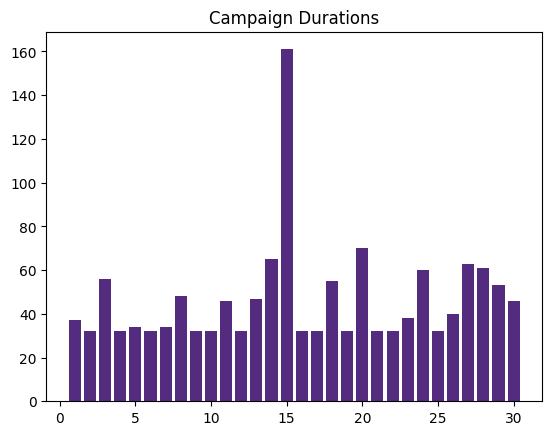

In [11]:
## let's explore the campaign lengths
campaign_desc['LENGTH'] = campaign_desc['END_DAY'] - campaign_desc['START_DAY']

## using 84.51's primary color
primary = '#532C7F'

## visualizing
plt.bar(campaign_desc['CAMPAIGN'], campaign_desc['LENGTH'], color = primary)
plt.title("Campaign Durations")
plt.show();

In [12]:
## avg length
campaign_desc['LENGTH'].describe()

,LENGTH
count,30.000000
mean,46.600000
std,24.856277
min,32.000000
25%,32.000000
50%,37.500000
75%,54.500000
max,161.000000


We see the most campaigns lasted between 1 and 2 months.

### **CAMPAIGN TABLE**

Campaign dataset contains identifying information for the marketing campaigns each household participated in.

In [13]:
## preview campaign table
campaign_table.head()

,DESCRIPTION,household_key,CAMPAIGN
0,TypeA,17,26
1,TypeA,27,26
2,TypeA,212,26
3,TypeA,208,26
4,TypeA,192,26


In [14]:
## preview campaign table info
campaign_table.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7208 entries, 0 to 7207
Data columns (total 3 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   DESCRIPTION    7208 non-null   object
 1   household_key  7208 non-null   int64 
 2   CAMPAIGN       7208 non-null   int64 
dtypes: int64(2), object(1)
memory usage: 169.1+ KB


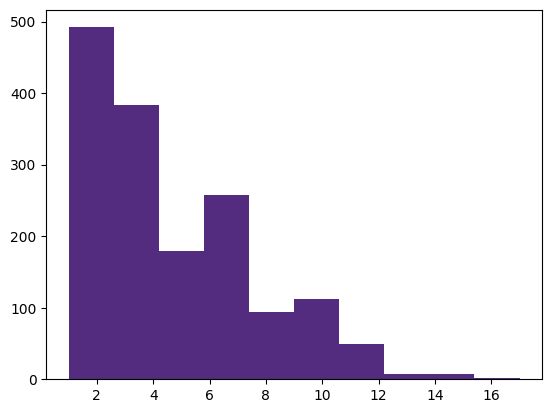

In [15]:
## househould value counts
plt.hist(campaign_table['household_key'].value_counts(), color = primary);

In [16]:
## nunique
campaign_table['household_key'].nunique()

1584

In [17]:
## distribution
campaign_table['household_key'].value_counts().describe()

,count
count,1584.000000
mean,4.550505
std,2.993988
min,1.000000
25%,2.000000
50%,4.000000
75%,6.000000
max,17.000000


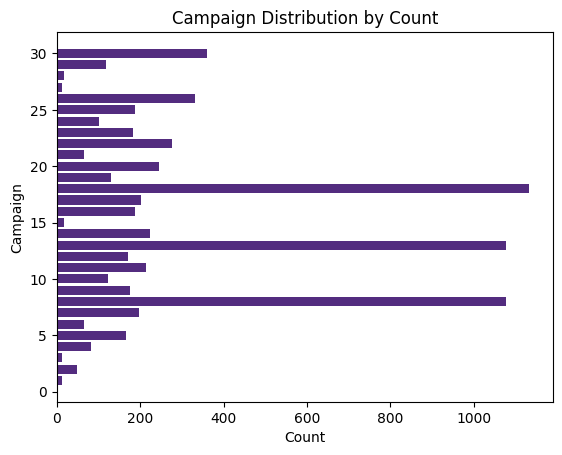

In [18]:
## what campaigns were these?
campaign_counts = campaign_table['CAMPAIGN'].value_counts()
plt.barh(campaign_counts.index, campaign_counts.values, color = primary);
plt.title("Campaign Distribution by Count")
plt.xlabel("Count")
plt.ylabel("Campaign")
plt.show();

1584 households received at least one campaign out of the original 2500 households. The median quantity of campaigns received was 4. The most common campaigns received were 18,13 and 8.

### **COUPONS**

Is a lookup table which lists all the coupons sent to customers as part of a campaign, as well as the products for which each coupon is redeemable

In [19]:
## preview coupon
coupon.head()

,COUPON_UPC,PRODUCT_ID,CAMPAIGN
0,10000089061,27160,4
1,10000089064,27754,9
2,10000089073,28897,12
3,51800009050,28919,28
4,52100000076,28929,25


In [20]:
## preview coupon info
coupon.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 124548 entries, 0 to 124547
Data columns (total 3 columns):
 #   Column      Non-Null Count   Dtype
---  ------      --------------   -----
 0   COUPON_UPC  124548 non-null  int64
 1   PRODUCT_ID  124548 non-null  int64
 2   CAMPAIGN    124548 non-null  int64
dtypes: int64(3)
memory usage: 2.9 MB


### **COUPON REDEMPTIONS**

Is a data table, ordered by household_key, gives which household redeemed what coupon number. Also the day of the redeem and the campaign number is given for each household.

In [21]:
## preview coupon redempt
coupon_redempt.head()

,household_key,DAY,COUPON_UPC,CAMPAIGN
0,1,421,10000085364,8
1,1,421,51700010076,8
2,1,427,54200000033,8
3,1,597,10000085476,18
4,1,597,54200029176,18


In [22]:
## preview coupon info
coupon_redempt.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2318 entries, 0 to 2317
Data columns (total 4 columns):
 #   Column         Non-Null Count  Dtype
---  ------         --------------  -----
 0   household_key  2318 non-null   int64
 1   DAY            2318 non-null   int64
 2   COUPON_UPC     2318 non-null   int64
 3   CAMPAIGN       2318 non-null   int64
dtypes: int64(4)
memory usage: 72.6 KB


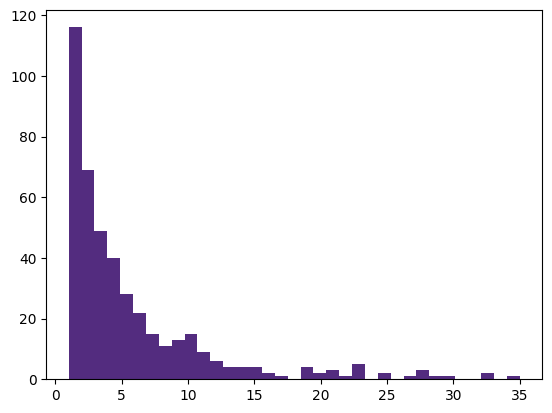

In [23]:
## lengths
plt.hist(coupon_redempt['household_key'].value_counts(), color = primary, bins= 35);

In [24]:
## distribution
coupon_redempt['household_key'].value_counts().describe()

,count
count,434.000000
mean,5.341014
std,6.052413
min,1.000000
25%,1.000000
50%,3.000000
75%,7.000000
max,35.000000


In [25]:
434/2500

0.1736

In [26]:
## redemption rates
campaign_desc.sort_values('CAMPAIGN', inplace = True)
rates = coupon_redempt['CAMPAIGN'].value_counts().sort_index() / campaign_table['CAMPAIGN'].value_counts().sort_index()
campaign_desc.set_index('CAMPAIGN', inplace = True)
campaign_desc['redemption_rate'] = rates

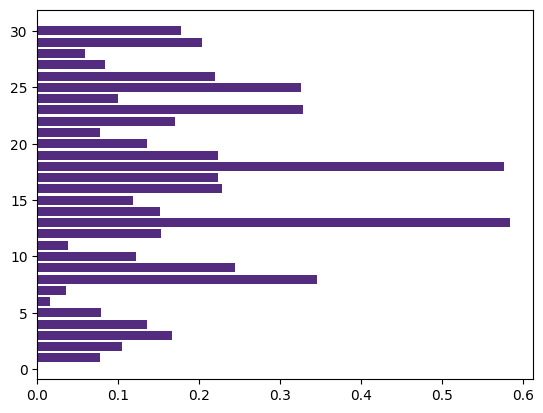

In [27]:
## visualize the top rates
plt.barh(campaign_desc.index , campaign_desc['redemption_rate'], color = primary);

17% (434) of the original 2500 households redeemed coupons. Of those, the median number of coupons redeemed was 3. The best converting of these were campaigns 18,13, and 8

### **TRANSACTION DATA**

Transactional data contains purchase history of each household. It contains the product ID and sales value, store ID and all other transactional features.

In [28]:
## preview transaction data
transaction_data.head()

,household_key,BASKET_ID,DAY,PRODUCT_ID,QUANTITY,SALES_VALUE,STORE_ID,RETAIL_DISC,TRANS_TIME,WEEK_NO,COUPON_DISC,COUPON_MATCH_DISC
0,2375,26984851472,1,1004906,1,1.39,364,-0.60,1631,1,0.0,0.0
1,2375,26984851472,1,1033142,1,0.82,364,0.00,1631,1,0.0,0.0
2,2375,26984851472,1,1036325,1,0.99,364,-0.30,1631,1,0.0,0.0
3,2375,26984851472,1,1082185,1,1.21,364,0.00,1631,1,0.0,0.0
4,2375,26984851472,1,8160430,1,1.50,364,-0.39,1631,1,0.0,0.0


In [29]:
## preview transaction data
transaction_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2595732 entries, 0 to 2595731
Data columns (total 12 columns):
 #   Column             Dtype  
---  ------             -----  
 0   household_key      int64  
 1   BASKET_ID          int64  
 2   DAY                int64  
 3   PRODUCT_ID         int64  
 4   QUANTITY           int64  
 5   SALES_VALUE        float64
 6   STORE_ID           int64  
 7   RETAIL_DISC        float64
 8   TRANS_TIME         int64  
 9   WEEK_NO            int64  
 10  COUPON_DISC        float64
 11  COUPON_MATCH_DISC  float64
dtypes: float64(4), int64(8)
memory usage: 237.6 MB


## **DEMOGRAPHIC DATA**

Demographics data contains household demographical information such as age group, marital status and househols size. We will be using this table as a base and add few columns after feature engineering. Target variable for the churn prediction will be added in the final dataset before moving on to the predictive modelling.

In [30]:
## preview transaction data
hh_demographic.head()

,AGE_DESC,MARITAL_STATUS_CODE,INCOME_DESC,HOMEOWNER_DESC,HH_COMP_DESC,HOUSEHOLD_SIZE_DESC,KID_CATEGORY_DESC,household_key
0,65+,A,35-49K,Homeowner,2 Adults No Kids,2,None/Unknown,1
1,45-54,A,50-74K,Homeowner,2 Adults No Kids,2,None/Unknown,7
2,25-34,U,25-34K,Unknown,2 Adults Kids,3,1,8
3,25-34,U,75-99K,Homeowner,2 Adults Kids,4,2,13
4,45-54,B,50-74K,Homeowner,Single Female,1,None/Unknown,16


In [31]:
## preview demographic data
hh_demographic.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 801 entries, 0 to 800
Data columns (total 8 columns):
 #   Column               Non-Null Count  Dtype 
---  ------               --------------  ----- 
 0   AGE_DESC             801 non-null    object
 1   MARITAL_STATUS_CODE  801 non-null    object
 2   INCOME_DESC          801 non-null    object
 3   HOMEOWNER_DESC       801 non-null    object
 4   HH_COMP_DESC         801 non-null    object
 5   HOUSEHOLD_SIZE_DESC  801 non-null    object
 6   KID_CATEGORY_DESC    801 non-null    object
 7   household_key        801 non-null    int64 
dtypes: int64(1), object(7)
memory usage: 50.2+ KB


## **PRODUCT**

The product table contains data on information on each product. Everything from manufacturer, brand, department, commodity descriptions and sub_commodirt descriptions, etc.

In [32]:
## preview product data
product.head()

,PRODUCT_ID,MANUFACTURER,DEPARTMENT,BRAND,COMMODITY_DESC,SUB_COMMODITY_DESC,CURR_SIZE_OF_PRODUCT
0,25671,2,GROCERY,National,FRZN ICE,ICE - CRUSHED/CUBED,22 LB
1,26081,2,MISC. TRANS.,National,NO COMMODITY DESCRIPTION,NO SUBCOMMODITY DESCRIPTION,
2,26093,69,PASTRY,Private,BREAD,BREAD:ITALIAN/FRENCH,
3,26190,69,GROCERY,Private,FRUIT - SHELF STABLE,APPLE SAUCE,50 OZ
4,26355,69,GROCERY,Private,COOKIES/CONES,SPECIALTY COOKIES,14 OZ


In [33]:
## preview product data
product.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 92353 entries, 0 to 92352
Data columns (total 7 columns):
 #   Column                Non-Null Count  Dtype 
---  ------                --------------  ----- 
 0   PRODUCT_ID            92353 non-null  int64 
 1   MANUFACTURER          92353 non-null  int64 
 2   DEPARTMENT            92353 non-null  object
 3   BRAND                 92353 non-null  object
 4   COMMODITY_DESC        92353 non-null  object
 5   SUB_COMMODITY_DESC    92353 non-null  object
 6   CURR_SIZE_OF_PRODUCT  92353 non-null  object
dtypes: int64(2), object(5)
memory usage: 4.9+ MB
